# Importing data

In [1]:
# since i am using data from Wikipedia and there is no much data, i have copied data from Wikipedia to Excel and uploaded it to IBM Watson Studio
# resource of data is: https://en.wikipedia.org/wiki/Districts_of_Zagreb
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_35152063f35c4640bfb196fad99c28b2 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='_2srwv-7NjiNbUvB-6ZNl0SM5j-WFnoCKe7hxKFId7Sc',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_35152063f35c4640bfb196fad99c28b2.get_object(Bucket='applieddata-donotdelete-pr-agzyxtdsrlj6sf',Key='Zagreb - data.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_0 = pd.read_excel(body)
df_data_0.head()

,District,size(km²),Population -2011,Density
0,Donji grad (Lower town),3,37.024,12.341
1,Gornji Grad–Medveščak (Upper town–Medveščak),10,30.962,3.096
2,Trnje,7,42.282,6.040
3,Maksimir,14,48.902,3.493
4,Peščenica – Žitnjak,35,56.487,1.614


# Importing latitude and longitude to existing data

In [2]:
#import geopy and test nominatim with example of Golden gate geo code
import geopy
from geopy.geocoders import Nominatim
nom = Nominatim()
n = nom.geocode('Golden gate')
print(n. latitude, n.longitude)

37.8303213 -122.4797496


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.


In [3]:
df_data_0['Coordinates']=df_data_0['District'].apply(nom.geocode)
df_data_0

,District,size(km²),Population -2011,Density,Coordinates
0,Donji grad (Lower town),3,37.024,12.341,"(Доњи град, Дорћол, Стари град, Градска општин..."
1,Gornji Grad–Medveščak (Upper town–Medveščak),10,30.962,3.096,None
2,Trnje,7,42.282,6.040,"(Trnje, 8212, Slovenija, (45.9366928, 14.96845..."
3,Maksimir,14,48.902,3.493,"(Maksimir, Zagreb, Grad Zagreb, 10000 ZAGREB, ..."
4,Peščenica – Žitnjak,35,56.487,1.614,"(Peščenica - Žitnjak, Zagreb, Grad Zagreb, Hrv..."
5,Novi Zagreb – istok (New Zagreb–East),17,59.055,3.474,"(Novi Zagreb - istok, Zagreb, Grad Zagreb, Hrv..."
6,Novi Zagreb – zapad (New Zagreb–West),63,58.103,922.000,"(Novi Zagreb - zapad, Zagreb, Grad Zagreb, Hrv..."
7,Trešnjevka – sjever (Trešnjevka–North),6,55.425,9.238,"(Trešnjevka, MO Stara Trešnjevka, Zagreb, Grad..."
8,Trešnjevka – jug (Trešnjevka–South),10,66.674,6.667,None
9,Črnomerec,24,38.546,1.606,"(Črnomerec, Zagreb, Grad Zagreb, 10.000, Hrvat..."


In [4]:
#since some of districts have wrong data and some dont have data first we will add additional column with Grad Zagreb suffix
df_data_0['District_Zagreb']=df_data_0['District'] + [', Grad Zagreb']
df_data_0

,District,size(km²),Population -2011,Density,Coordinates,District_Zagreb
0,Donji grad (Lower town),3,37.024,12.341,"(Доњи град, Дорћол, Стари град, Градска општин...","Donji grad (Lower town), Grad Zagreb"
1,Gornji Grad–Medveščak (Upper town–Medveščak),10,30.962,3.096,None,"Gornji Grad–Medveščak (Upper town–Medveščak), ..."
2,Trnje,7,42.282,6.040,"(Trnje, 8212, Slovenija, (45.9366928, 14.96845...","Trnje, Grad Zagreb"
3,Maksimir,14,48.902,3.493,"(Maksimir, Zagreb, Grad Zagreb, 10000 ZAGREB, ...","Maksimir, Grad Zagreb"
4,Peščenica – Žitnjak,35,56.487,1.614,"(Peščenica - Žitnjak, Zagreb, Grad Zagreb, Hrv...","Peščenica – Žitnjak, Grad Zagreb"
5,Novi Zagreb – istok (New Zagreb–East),17,59.055,3.474,"(Novi Zagreb - istok, Zagreb, Grad Zagreb, Hrv...","Novi Zagreb – istok (New Zagreb–East), Grad Za..."
6,Novi Zagreb – zapad (New Zagreb–West),63,58.103,922.000,"(Novi Zagreb - zapad, Zagreb, Grad Zagreb, Hrv...","Novi Zagreb – zapad (New Zagreb–West), Grad Za..."
7,Trešnjevka – sjever (Trešnjevka–North),6,55.425,9.238,"(Trešnjevka, MO Stara Trešnjevka, Zagreb, Grad...","Trešnjevka – sjever (Trešnjevka–North), Grad Z..."
8,Trešnjevka – jug (Trešnjevka–South),10,66.674,6.667,None,"Trešnjevka – jug (Trešnjevka–South), Grad Zagreb"
9,Črnomerec,24,38.546,1.606,"(Črnomerec, Zagreb, Grad Zagreb, 10.000, Hrvat...","Črnomerec, Grad Zagreb"


In [5]:
df_data_0['Coordinates']=df_data_0['District_Zagreb'].apply(nom.geocode)
df_data_0

,District,size(km²),Population -2011,Density,Coordinates,District_Zagreb
0,Donji grad (Lower town),3,37.024,12.341,None,"Donji grad (Lower town), Grad Zagreb"
1,Gornji Grad–Medveščak (Upper town–Medveščak),10,30.962,3.096,None,"Gornji Grad–Medveščak (Upper town–Medveščak), ..."
2,Trnje,7,42.282,6.040,"(Grad Zagreb, 1, Trg Stjepana Radića, Martinov...","Trnje, Grad Zagreb"
3,Maksimir,14,48.902,3.493,"(Maksimir, Zagreb, Grad Zagreb, 10000 ZAGREB, ...","Maksimir, Grad Zagreb"
4,Peščenica – Žitnjak,35,56.487,1.614,"(Peščenica - Žitnjak, Zagreb, Grad Zagreb, Hrv...","Peščenica – Žitnjak, Grad Zagreb"
5,Novi Zagreb – istok (New Zagreb–East),17,59.055,3.474,"(Novi Zagreb - istok, Zagreb, Grad Zagreb, Hrv...","Novi Zagreb – istok (New Zagreb–East), Grad Za..."
6,Novi Zagreb – zapad (New Zagreb–West),63,58.103,922.000,"(Novi Zagreb - zapad, Zagreb, Grad Zagreb, Hrv...","Novi Zagreb – zapad (New Zagreb–West), Grad Za..."
7,Trešnjevka – sjever (Trešnjevka–North),6,55.425,9.238,"(Trešnjevka - sjever, Zagreb, Grad Zagreb, 100...","Trešnjevka – sjever (Trešnjevka–North), Grad Z..."
8,Trešnjevka – jug (Trešnjevka–South),10,66.674,6.667,"(Trešnjevka - jug, Zagreb, Grad Zagreb, Hrvats...","Trešnjevka – jug (Trešnjevka–South), Grad Zagreb"
9,Črnomerec,24,38.546,1.606,"(Črnomerec, Zagreb, Grad Zagreb, 10.000, Hrvat...","Črnomerec, Grad Zagreb"


In [6]:
#since we are using coordinates column just for defining langitude and latitude, we will move forward and for three none data districts and it manually
df_data_0['Latitude']=df_data_0['Coordinates'].apply(lambda x: x.latitude if x != None else None)
df_data_0['Longitude']=df_data_0['Coordinates'].apply(lambda x: x.longitude if x != None else None)
df_data_0

,District,size(km²),Population -2011,Density,Coordinates,District_Zagreb,Latitude,Longitude
0,Donji grad (Lower town),3,37.024,12.341,None,"Donji grad (Lower town), Grad Zagreb",NaN,NaN
1,Gornji Grad–Medveščak (Upper town–Medveščak),10,30.962,3.096,None,"Gornji Grad–Medveščak (Upper town–Medveščak), ...",NaN,NaN
2,Trnje,7,42.282,6.040,"(Grad Zagreb, 1, Trg Stjepana Radića, Martinov...","Trnje, Grad Zagreb",45.801168,15.977048
3,Maksimir,14,48.902,3.493,"(Maksimir, Zagreb, Grad Zagreb, 10000 ZAGREB, ...","Maksimir, Grad Zagreb",45.833312,16.010151
4,Peščenica – Žitnjak,35,56.487,1.614,"(Peščenica - Žitnjak, Zagreb, Grad Zagreb, Hrv...","Peščenica – Žitnjak, Grad Zagreb",45.787527,16.045939
5,Novi Zagreb – istok (New Zagreb–East),17,59.055,3.474,"(Novi Zagreb - istok, Zagreb, Grad Zagreb, Hrv...","Novi Zagreb – istok (New Zagreb–East), Grad Za...",45.759520,16.007969
6,Novi Zagreb – zapad (New Zagreb–West),63,58.103,922.000,"(Novi Zagreb - zapad, Zagreb, Grad Zagreb, Hrv...","Novi Zagreb – zapad (New Zagreb–West), Grad Za...",45.760738,15.921552
7,Trešnjevka – sjever (Trešnjevka–North),6,55.425,9.238,"(Trešnjevka - sjever, Zagreb, Grad Zagreb, 100...","Trešnjevka – sjever (Trešnjevka–North), Grad Z...",45.801677,15.940319
8,Trešnjevka – jug (Trešnjevka–South),10,66.674,6.667,"(Trešnjevka - jug, Zagreb, Grad Zagreb, Hrvats...","Trešnjevka – jug (Trešnjevka–South), Grad Zagreb",45.786266,15.922941
9,Črnomerec,24,38.546,1.606,"(Črnomerec, Zagreb, Grad Zagreb, 10.000, Hrvat...","Črnomerec, Grad Zagreb",45.782765,15.937838


In [7]:
#other data is provided manually by https://latitude.to/map/hr/croatia/regions/grad-zagreb/gradska-cetvrt-donji-grad 
#https://latitude.to/lat/45.81471/lng/15.97338 https://latitude.to/articles-by-country/hr/croatia/178975/donja-dubrava-zagreb
#values are imported in latitude and longitude columns
df_data_0.at[0,'Latitude'] = 45.80834
df_data_0.at[0,'Longitude'] = 15.96949
df_data_0.at[1,'Latitude'] = 45.81471
df_data_0.at[1,'Longitude'] = 15.97338
df_data_0.at[11,'Latitude'] = 45.82239
df_data_0.at[11,'Longitude'] = 16.05073
df_data_0

,District,size(km²),Population -2011,Density,Coordinates,District_Zagreb,Latitude,Longitude
0,Donji grad (Lower town),3,37.024,12.341,None,"Donji grad (Lower town), Grad Zagreb",45.808340,15.969490
1,Gornji Grad–Medveščak (Upper town–Medveščak),10,30.962,3.096,None,"Gornji Grad–Medveščak (Upper town–Medveščak), ...",45.814710,15.973380
2,Trnje,7,42.282,6.040,"(Grad Zagreb, 1, Trg Stjepana Radića, Martinov...","Trnje, Grad Zagreb",45.801168,15.977048
3,Maksimir,14,48.902,3.493,"(Maksimir, Zagreb, Grad Zagreb, 10000 ZAGREB, ...","Maksimir, Grad Zagreb",45.833312,16.010151
4,Peščenica – Žitnjak,35,56.487,1.614,"(Peščenica - Žitnjak, Zagreb, Grad Zagreb, Hrv...","Peščenica – Žitnjak, Grad Zagreb",45.787527,16.045939
5,Novi Zagreb – istok (New Zagreb–East),17,59.055,3.474,"(Novi Zagreb - istok, Zagreb, Grad Zagreb, Hrv...","Novi Zagreb – istok (New Zagreb–East), Grad Za...",45.759520,16.007969
6,Novi Zagreb – zapad (New Zagreb–West),63,58.103,922.000,"(Novi Zagreb - zapad, Zagreb, Grad Zagreb, Hrv...","Novi Zagreb – zapad (New Zagreb–West), Grad Za...",45.760738,15.921552
7,Trešnjevka – sjever (Trešnjevka–North),6,55.425,9.238,"(Trešnjevka - sjever, Zagreb, Grad Zagreb, 100...","Trešnjevka – sjever (Trešnjevka–North), Grad Z...",45.801677,15.940319
8,Trešnjevka – jug (Trešnjevka–South),10,66.674,6.667,"(Trešnjevka - jug, Zagreb, Grad Zagreb, Hrvats...","Trešnjevka – jug (Trešnjevka–South), Grad Zagreb",45.786266,15.922941
9,Črnomerec,24,38.546,1.606,"(Črnomerec, Zagreb, Grad Zagreb, 10.000, Hrvat...","Črnomerec, Grad Zagreb",45.782765,15.937838


In [8]:
#since there is too many columns, we will preserve just the ones that are needed
zagreb_df = df_data_0[['District','size(km²)','Population -2011', 'Latitude', 'Longitude']]
zagreb_df

,District,size(km²),Population -2011,Latitude,Longitude
0,Donji grad (Lower town),3,37.024,45.808340,15.969490
1,Gornji Grad–Medveščak (Upper town–Medveščak),10,30.962,45.814710,15.973380
2,Trnje,7,42.282,45.801168,15.977048
3,Maksimir,14,48.902,45.833312,16.010151
4,Peščenica – Žitnjak,35,56.487,45.787527,16.045939
5,Novi Zagreb – istok (New Zagreb–East),17,59.055,45.759520,16.007969
6,Novi Zagreb – zapad (New Zagreb–West),63,58.103,45.760738,15.921552
7,Trešnjevka – sjever (Trešnjevka–North),6,55.425,45.801677,15.940319
8,Trešnjevka – jug (Trešnjevka–South),10,66.674,45.786266,15.922941
9,Črnomerec,24,38.546,45.782765,15.937838


In [9]:
import pandas as pd
import requests
import numpy as np
!pip install folium

In [10]:
#testing values in dataframe
locations = zagreb_df[['Latitude', 'Longitude']]
locationlist = locations.values.tolist()
len(locationlist)
locationlist[3]

[45.8333119, 16.0101508]

# Visualizing data with folium

In [11]:
import folium
map = folium.Map(location=[45.8, 15.94], zoom_start=13)
for i in range(0,len(zagreb_df)):
   folium.Circle(
      location=[zagreb_df.iloc[i]['Longitude'], zagreb_df.iloc[i]['Latitude']],
      popup=zagreb_df.iloc[i]['District'],
      radius=zagreb_df.iloc[i]['Population -2011']*10000,
      color='crimson',
      fill=True,
      fill_color='crimson').add_to(map)

map

In [12]:
#some of the coordinates are still wrong, so we will add right value to them
#as in previous case we will import data from latlong.net
zagreb_df.at[9,'Latitude'] = 45.82618
zagreb_df.at[9,'Longitude'] = 15.93631
zagreb_df.at[14,'Latitude'] = 45.86097
zagreb_df.at[14,'Longitude'] = 15.97996
zagreb_df.rename(columns = {'size(km²)':'size(km2)'}, inplace = True)
zagreb_df

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,District,size(km2),Population -2011,Latitude,Longitude
0,Donji grad (Lower town),3,37.024,45.808340,15.969490
1,Gornji Grad–Medveščak (Upper town–Medveščak),10,30.962,45.814710,15.973380
2,Trnje,7,42.282,45.801168,15.977048
3,Maksimir,14,48.902,45.833312,16.010151
4,Peščenica – Žitnjak,35,56.487,45.787527,16.045939
5,Novi Zagreb – istok (New Zagreb–East),17,59.055,45.759520,16.007969
6,Novi Zagreb – zapad (New Zagreb–West),63,58.103,45.760738,15.921552
7,Trešnjevka – sjever (Trešnjevka–North),6,55.425,45.801677,15.940319
8,Trešnjevka – jug (Trešnjevka–South),10,66.674,45.786266,15.922941
9,Črnomerec,24,38.546,45.826180,15.936310


In [13]:
#since we are done with changing values in district geo data we will create new map
map_zagreb = folium.Map(location=[45.8333119, 16.0101508], zoom_start=12)

for (index, row) in zagreb_df.iterrows():
    folium.Marker(location=[row.loc['Latitude'], row.loc['Longitude']], 
                  popup=row.loc['District']).add_to(map_zagreb)
map_zagreb

# Using Foursquare to access additional data

In [14]:
#define login data for Foursquare
CLIENT_ID = 'X2ZJA5ACPGNMT5AQ3PPRTYXATNJR5HQMOH3SESU5IDSHDBGO' # your Foursquare ID
CLIENT_SECRET = '00MFAH310VUI2GZ2LCVTNYODEMO5EBWTGHUKGTGF414SRAF0' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: X2ZJA5ACPGNMT5AQ3PPRTYXATNJR5HQMOH3SESU5IDSHDBGO
CLIENT_SECRET:00MFAH310VUI2GZ2LCVTNYODEMO5EBWTGHUKGTGF414SRAF0


In [15]:
#import additional modules
from pandas.io.json import json_normalize

In [16]:
#since there was few results with 'hospital' as search_query word, we use croatian word bolnica
# we use geo data of Zagreb central square 
search_query = 'bolnica'
radius = 20000
latitude = 45.813032
longitude = 15.977165

In [17]:
#define url for query
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=X2ZJA5ACPGNMT5AQ3PPRTYXATNJR5HQMOH3SESU5IDSHDBGO&client_secret=00MFAH310VUI2GZ2LCVTNYODEMO5EBWTGHUKGTGF414SRAF0&ll=45.813032,15.977165&v=20180604&query=bolnica&radius=20000&limit=30'

In [18]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e94aa78216785001bf5072e'},
 'response': {'venues': [{'id': '4dd13d68d4c065592fc125cb',
    'name': 'Psihijatrijska bolnica za djecu i mladez',
    'location': {'address': 'Kukuljeviceva 11',
     'lat': 45.81462994556163,
     'lng': 15.963652997511923,
     'labeledLatLngs': [{'label': 'display',
       'lat': 45.81462994556163,
       'lng': 15.963652997511923}],
     'distance': 1063,
     'postalCode': '10000',
     'cc': 'HR',
     'city': 'Zagreb',
     'state': 'Grad Zagreb',
     'country': 'Hrvatska',
     'formattedAddress': ['Kukuljeviceva 11', '10000 Zagreb', 'Hrvatska']},
    'categories': [{'id': '4bf58dd8d48988d196941735',
      'name': 'Hospital',
      'pluralName': 'Hospitals',
      'shortName': 'Hospital',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1586801294',
    'hasPerk': False},
   {'id': '4c31c93616adc9285e11c1

In [19]:
venues=results['response']['venues']

In [20]:
venues

[{'id': '4dd13d68d4c065592fc125cb',
  'name': 'Psihijatrijska bolnica za djecu i mladez',
  'location': {'address': 'Kukuljeviceva 11',
   'lat': 45.81462994556163,
   'lng': 15.963652997511923,
   'labeledLatLngs': [{'label': 'display',
     'lat': 45.81462994556163,
     'lng': 15.963652997511923}],
   'distance': 1063,
   'postalCode': '10000',
   'cc': 'HR',
   'city': 'Zagreb',
   'state': 'Grad Zagreb',
   'country': 'Hrvatska',
   'formattedAddress': ['Kukuljeviceva 11', '10000 Zagreb', 'Hrvatska']},
  'categories': [{'id': '4bf58dd8d48988d196941735',
    'name': 'Hospital',
    'pluralName': 'Hospitals',
    'shortName': 'Hospital',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1586801294',
  'hasPerk': False},
 {'id': '4c31c93616adc9285e11c19c',
  'name': 'Klinička bolnica Merkur',
  'location': {'address': 'Zajčeva 19',
   'lat': 45.82084043358609,
   'lng': 15.9979304220095

In [21]:
nearby_venues = json_normalize(venues)

In [22]:
nearby_venues

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",False,4dd13d68d4c065592fc125cb,Kukuljeviceva 11,HR,Zagreb,Hrvatska,1063,"[Kukuljeviceva 11, 10000 Zagreb, Hrvatska]","[{'label': 'display', 'lat': 45.81462994556163...",45.814630,15.963653,10000,Grad Zagreb,Psihijatrijska bolnica za djecu i mladez,v-1586801294
1,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",False,4c31c93616adc9285e11c19c,Zajčeva 19,HR,Zagreb,Hrvatska,1830,"[Zajčeva 19, 10000 Zagreb, Hrvatska]","[{'label': 'display', 'lat': 45.82084043358609...",45.820840,15.997930,10000,Grad Zagreb,Klinička bolnica Merkur,v-1586801294
2,"[{'id': '4bf58dd8d48988d104941735', 'name': 'M...",False,51dd312b498ec999026b084d,NaN,HR,NaN,Hrvatska,1898,[Hrvatska],"[{'label': 'display', 'lat': 45.82976624195230...",45.829766,15.981899,NaN,NaN,Bolnica za plucne bolesti,v-1586801294
3,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",False,4dfb40c788775f8b52f855ab,Goljak 2,HR,Zagreb,Hrvatska,1217,"[Goljak 2, Zagreb, Hrvatska]","[{'label': 'display', 'lat': 45.81894217837268...",45.818942,15.963958,NaN,Grad Zagreb,Specijalna bolnica Goljak,v-1586801294
4,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",False,4d5ea5b55c39b1f7c231ee49,Runjaninova 4,HR,Zagreb,Hrvatska,1081,"[Runjaninova 4, Zagreb, Hrvatska]","[{'label': 'display', 'lat': 45.80495065202248...",45.804951,15.969430,NaN,Grad Zagreb,Bolnica Runjaninova,v-1586801294
5,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",False,4c04b6c239d476b028dc31a7,Petrova 13,HR,Zagreb,Hrvatska,1274,"[Petrova 13, 10000 Zagreb, Hrvatska]","[{'label': 'display', 'lat': 45.8153806341047,...",45.815381,15.993247,10000,Grad Zagreb,KBC Zagreb (Petrova bolnica),v-1586801294
6,[],False,4f0ab02ee4b0a2229d1b3f25,NaN,HR,NaN,Hrvatska,945,[Hrvatska],"[{'label': 'display', 'lat': 45.82007110055186...",45.820071,15.983979,NaN,NaN,Ortopedija Salata - bolnica,v-1586801294
7,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",False,4d9d7d07c99fb60c0b0ec88b,vlaška,HR,Zagreb,Hrvatska,978,"[vlaška, Zagreb, Hrvatska]","[{'label': 'display', 'lat': 45.81390828801203...",45.813908,15.989718,NaN,Grad Zagreb,Napuštena Vojna Bolnica,v-1586801294
8,"[{'id': '52e81612bcbc57f1066b79e7', 'name': 'C...",False,53886640498e7a14c98fd862,NaN,HR,NaN,Hrvatska,978,[Hrvatska],"[{'label': 'display', 'lat': 45.81466427342816...",45.814664,15.989551,NaN,NaN,Dan D Vojna bolnica,v-1586801294
9,"[{'id': '4d954af4a243a5684765b473', 'name': 'V...",False,4dde70bd18387791399da846,NaN,HR,Zagreb,Hrvatska,3976,"[Zagreb, Hrvatska]","[{'label': 'display', 'lat': 45.794555, 'lng':...",45.794555,15.933313,NaN,Grad Zagreb,Veterinarska bolnica Hospivet,v-1586801294


In [23]:
filtered_columns = ['name', 'location.state', 'location.address', 'location.lat', 'location.lng']
nearby_venues = nearby_venues.loc[:, filtered_columns]

In [24]:
nearby_venues

,name,location.state,location.address,location.lat,location.lng
0,Psihijatrijska bolnica za djecu i mladez,Grad Zagreb,Kukuljeviceva 11,45.814630,15.963653
1,Klinička bolnica Merkur,Grad Zagreb,Zajčeva 19,45.820840,15.997930
2,Bolnica za plucne bolesti,NaN,NaN,45.829766,15.981899
3,Specijalna bolnica Goljak,Grad Zagreb,Goljak 2,45.818942,15.963958
4,Bolnica Runjaninova,Grad Zagreb,Runjaninova 4,45.804951,15.969430
5,KBC Zagreb (Petrova bolnica),Grad Zagreb,Petrova 13,45.815381,15.993247
6,Ortopedija Salata - bolnica,NaN,NaN,45.820071,15.983979
7,Napuštena Vojna Bolnica,Grad Zagreb,vlaška,45.813908,15.989718
8,Dan D Vojna bolnica,NaN,NaN,45.814664,15.989551
9,Veterinarska bolnica Hospivet,Grad Zagreb,NaN,45.794555,15.933313


In [25]:
#after we got data from Foursquare, we need to remove some of hospitals which are not in Zagreb, and also veterinary hospital
zg_hospitals=nearby_venues.drop([7, 8, 9, 13, 15, 17, 18, 19, 21, 22, 24, 25])

In [26]:
zg_hospitals

,name,location.state,location.address,location.lat,location.lng
0,Psihijatrijska bolnica za djecu i mladez,Grad Zagreb,Kukuljeviceva 11,45.814630,15.963653
1,Klinička bolnica Merkur,Grad Zagreb,Zajčeva 19,45.820840,15.997930
2,Bolnica za plucne bolesti,NaN,NaN,45.829766,15.981899
3,Specijalna bolnica Goljak,Grad Zagreb,Goljak 2,45.818942,15.963958
4,Bolnica Runjaninova,Grad Zagreb,Runjaninova 4,45.804951,15.969430
5,KBC Zagreb (Petrova bolnica),Grad Zagreb,Petrova 13,45.815381,15.993247
6,Ortopedija Salata - bolnica,NaN,NaN,45.820071,15.983979
10,Psihijatrijska bolnica Vrapče,Grad Zagreb,Bolnička 23,45.814980,15.901643
11,Specijalna Bolnica Podobnik,Grad Zagreb,Sveti Duh 112,45.824963,15.939414
12,Zarazna bolnica F.Mihaljevic,Grad Zagreb,Mirogojska,45.830219,15.981030


In [27]:
!pip install folium
from folium import plugins

In [28]:
import folium
map_hospitals = folium.Map(location=[45.8333119, 16.0101508], zoom_start=12)

for (index, row) in zg_hospitals.iterrows():
    folium.Marker(location=[row.loc['location.lat'], row.loc['location.lng']], 
                  popup=row.loc['name']).add_to(map_hospitals)
map_hospitals

In [29]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()

In [37]:
zg_hospitals=zg_hospitals.rename(columns={"location.lat": "Latitude", "location.lng": "Longitude"})

In [31]:
#remove private clinic
zg_hospitals=zg_hospitals.drop([11])
zg_hospitals

,name,location.state,location.address,Latitude,Longitude
0,Psihijatrijska bolnica za djecu i mladez,Grad Zagreb,Kukuljeviceva 11,45.814630,15.963653
1,Klinička bolnica Merkur,Grad Zagreb,Zajčeva 19,45.820840,15.997930
2,Bolnica za plucne bolesti,NaN,NaN,45.829766,15.981899
3,Specijalna bolnica Goljak,Grad Zagreb,Goljak 2,45.818942,15.963958
4,Bolnica Runjaninova,Grad Zagreb,Runjaninova 4,45.804951,15.969430
5,KBC Zagreb (Petrova bolnica),Grad Zagreb,Petrova 13,45.815381,15.993247
6,Ortopedija Salata - bolnica,NaN,NaN,45.820071,15.983979
10,Psihijatrijska bolnica Vrapče,Grad Zagreb,Bolnička 23,45.814980,15.901643
12,Zarazna bolnica F.Mihaljevic,Grad Zagreb,Mirogojska,45.830219,15.981030
14,Bolnica sv. Duh,NaN,NaN,45.800286,15.915221


In [39]:
map_zg_hospitals = folium.Map(location=[45.8333119, 16.0101508], zoom_start=12)

for (index, row) in zg_hospitals.iterrows():
    folium.Marker(location=[row.loc['Latitude'], row.loc['Longitude']], 
                  popup=row.loc['name']).add_to(map_zg_hospitals)
map_zg_hospitals

# Clustering data and using k-means

In [41]:
#we need to trim data for clustering data
X=zg_hospitals.loc[:,['name','Latitude','Longitude']]
X

,name,Latitude,Longitude
0,Psihijatrijska bolnica za djecu i mladez,45.814630,15.963653
1,Klinička bolnica Merkur,45.820840,15.997930
2,Bolnica za plucne bolesti,45.829766,15.981899
3,Specijalna bolnica Goljak,45.818942,15.963958
4,Bolnica Runjaninova,45.804951,15.969430
5,KBC Zagreb (Petrova bolnica),45.815381,15.993247
6,Ortopedija Salata - bolnica,45.820071,15.983979
10,Psihijatrijska bolnica Vrapče,45.814980,15.901643
12,Zarazna bolnica F.Mihaljevic,45.830219,15.981030
14,Bolnica sv. Duh,45.800286,15.915221


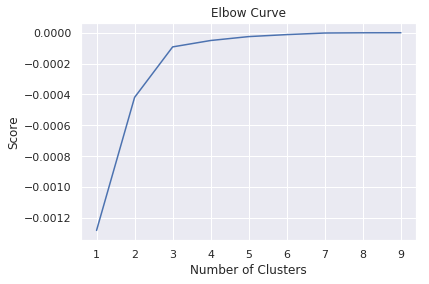

In [42]:
#we use k-means clustering to see were is a elbow in clusters
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = zg_hospitals[['Latitude']]
X_axis = zg_hospitals[['Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

# Visualization
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

#as we can see elbow is on number 3

In [43]:
#kmeans clustering
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(X[X.columns[1:3]])

X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ 
labels = kmeans.predict(X[X.columns[1:3]])

X

,name,Latitude,Longitude,cluster_label
0,Psihijatrijska bolnica za djecu i mladez,45.814630,15.963653,1
1,Klinička bolnica Merkur,45.820840,15.997930,1
2,Bolnica za plucne bolesti,45.829766,15.981899,1
3,Specijalna bolnica Goljak,45.818942,15.963958,1
4,Bolnica Runjaninova,45.804951,15.969430,1
5,KBC Zagreb (Petrova bolnica),45.815381,15.993247,1
6,Ortopedija Salata - bolnica,45.820071,15.983979,1
10,Psihijatrijska bolnica Vrapče,45.814980,15.901643,2
12,Zarazna bolnica F.Mihaljevic,45.830219,15.981030,1
14,Bolnica sv. Duh,45.800286,15.915221,2


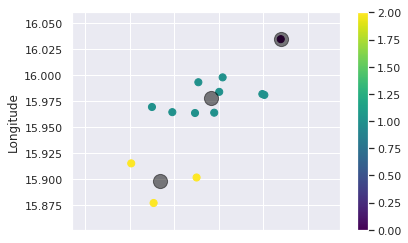

In [45]:
X.plot.scatter(x = 'Latitude', y = 'Longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [46]:
XX=zagreb_df.loc[:,['District','Latitude','Longitude']]
XX

,District,Latitude,Longitude
0,Donji grad (Lower town),45.808340,15.969490
1,Gornji Grad–Medveščak (Upper town–Medveščak),45.814710,15.973380
2,Trnje,45.801168,15.977048
3,Maksimir,45.833312,16.010151
4,Peščenica – Žitnjak,45.787527,16.045939
5,Novi Zagreb – istok (New Zagreb–East),45.759520,16.007969
6,Novi Zagreb – zapad (New Zagreb–West),45.760738,15.921552
7,Trešnjevka – sjever (Trešnjevka–North),45.801677,15.940319
8,Trešnjevka – jug (Trešnjevka–South),45.786266,15.922941
9,Črnomerec,45.826180,15.936310


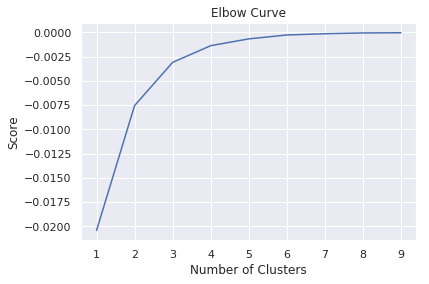

In [48]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = zagreb_df[['Latitude']]
X_axis = zagreb_df[['Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

# Visualization
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

#as we can see elbow is on number 3

In [51]:
#kmeans clustering
kmeans = KMeans(n_clusters = 4, init ='k-means++')
kmeans.fit(XX[XX.columns[1:4]])

XX['cluster_label'] = kmeans.fit_predict(XX[XX.columns[1:4]])
centers = kmeans.cluster_centers_ 
labels = kmeans.predict(XX[XX.columns[1:4]])

XX

,District,Latitude,Longitude,cluster_label
0,Donji grad (Lower town),45.808340,15.969490,2
1,Gornji Grad–Medveščak (Upper town–Medveščak),45.814710,15.973380,2
2,Trnje,45.801168,15.977048,2
3,Maksimir,45.833312,16.010151,2
4,Peščenica – Žitnjak,45.787527,16.045939,1
5,Novi Zagreb – istok (New Zagreb–East),45.759520,16.007969,2
6,Novi Zagreb – zapad (New Zagreb–West),45.760738,15.921552,3
7,Trešnjevka – sjever (Trešnjevka–North),45.801677,15.940319,2
8,Trešnjevka – jug (Trešnjevka–South),45.786266,15.922941,3
9,Črnomerec,45.826180,15.936310,2


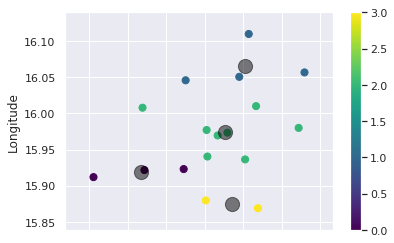

In [53]:
XX.plot.scatter(x = 'Latitude', y = 'Longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
#we will use another model with 3 clusters

In [54]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(XX[XX.columns[1:3]])

XX['cluster_label'] = kmeans.fit_predict(XX[XX.columns[1:3]])
centers = kmeans.cluster_centers_ 
labels = kmeans.predict(XX[XX.columns[1:3]])

XX

,District,Latitude,Longitude,cluster_label
0,Donji grad (Lower town),45.808340,15.969490,1
1,Gornji Grad–Medveščak (Upper town–Medveščak),45.814710,15.973380,1
2,Trnje,45.801168,15.977048,1
3,Maksimir,45.833312,16.010151,1
4,Peščenica – Žitnjak,45.787527,16.045939,2
5,Novi Zagreb – istok (New Zagreb–East),45.759520,16.007969,1
6,Novi Zagreb – zapad (New Zagreb–West),45.760738,15.921552,0
7,Trešnjevka – sjever (Trešnjevka–North),45.801677,15.940319,1
8,Trešnjevka – jug (Trešnjevka–South),45.786266,15.922941,0
9,Črnomerec,45.826180,15.936310,1


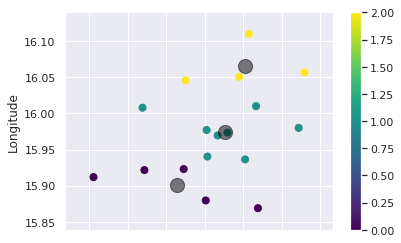

In [55]:
#new visualization
XX.plot.scatter(x = 'Latitude', y = 'Longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
#as we can see this is more accurate

# Conclusion

As was seen above, most of Zagreb hospitals are placed in city center. Problem is that there is a need for new hospital, this analysis shows that the new hospital shoudl be placed in south-western part of town. Reason for this is that most citizens live there, and also, on that please, as we cans see is no hospital.